In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
import json
from pprint import pprint

In [2]:
#import csv
oscars_data = "../the_oscar_award.csv"

In [3]:
#create dataframe
oscars_data_df = pd.read_csv(oscars_data)
oscars_data_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS IN A LEADING ROLE,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS IN A LEADING ROLE,Gloria Swanson,Sadie Thompson,False


In [4]:
#create dataframe of best picture winners and nominees
oscars_data_best_picture_nominees_df = oscars_data_df[oscars_data_df['category'] == 'BEST PICTURE']
oscars_data_best_picture_nominees_df.head()


,year_film,year_ceremony,ceremony,category,name,film,winner
19,1927,1928,1,BEST PICTURE,The Caddo Company,The Racket,False
20,1927,1928,1,BEST PICTURE,Fox,7th Heaven,False
21,1927,1928,1,BEST PICTURE,Paramount Famous Lasky,Wings,True
62,1928,1929,2,BEST PICTURE,Feature Productions,Alibi,False
63,1928,1929,2,BEST PICTURE,Fox,In Old Arizona,False


In [5]:
#find the winners
oscars_data_df = oscars_data_df[oscars_data_df['winner'] == False] 
oscars_data_df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
2,1927,1928,1,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False
4,1927,1928,1,ACTRESS IN A LEADING ROLE,Gloria Swanson,Sadie Thompson,False
5,1927,1928,1,ART DIRECTION,Rochus Gliese,Sunrise,False
7,1927,1928,1,ART DIRECTION,Harry Oliver,7th Heaven,False


In [6]:
#import API data from OMDb and run test film to identify fields

from config import OMDb_api_key

query_url = f"http://www.omdbapi.com/?apikey={OMDb_api_key}&t="
response = requests.get(query_url +"The Broadway Melody").json()
#response

In [7]:
# create lists to hold reponse info     
film_list = [] 
year_release_list = []       
date_release_list = []     


movies = oscars_data_best_picture_nominees_df["film"]
years = oscars_data_best_picture_nominees_df["year_film"]

In [8]:
#create list of movies and release years

#create list of movies and release years

print("Oscar_Winners")
print ("-------------")
counter = 1
nb_tries = 10

for movie,year in zip(movies,years):
    
    #print(movie,year)
    movie_url = query_url + movie.replace(' ','+')
    response = requests.get(movie_url)
    results = response
    response
    print(f'The Best Picture Nominees for {year} is {movie}')
    #oscars_best_picture_nominees_df.loc[index, "oscars_best_picture_nominees_df"] = results[0]['Date Released']
    
    try:
        response.raise_for_status()
        data = response.json()
        film_list.append(data['Title'])
        year_release_list.append(data['Year'])
        date_release_list.append(data['Released'])
        #oscars_best_picture_nominees_df.loc[date_release_list, "oscars_best_picture_nominees_df"] = data[0]['Date Released']
    except requests.exceptions.HTTPError as e:
        print('Movie not found. Move to next...')
    except KeyError:
        pass

Oscar_Winners
-------------
The Best Picture Nominees for 1927 is The Racket
The Best Picture Nominees for 1927 is 7th Heaven
The Best Picture Nominees for 1927 is Wings
The Best Picture Nominees for 1928 is Alibi
The Best Picture Nominees for 1928 is In Old Arizona
The Best Picture Nominees for 1928 is The Broadway Melody
The Best Picture Nominees for 1928 is Hollywood Revue
The Best Picture Nominees for 1928 is The Patriot
The Best Picture Nominees for 1929 is All Quiet on the Western Front
The Best Picture Nominees for 1929 is The Big House
The Best Picture Nominees for 1929 is Disraeli
The Best Picture Nominees for 1929 is The Divorcee
The Best Picture Nominees for 1929 is The Love Parade
The Best Picture Nominees for 1930 is Cimarron
The Best Picture Nominees for 1930 is East Lynne
The Best Picture Nominees for 1930 is The Front Page
The Best Picture Nominees for 1930 is Skippy
The Best Picture Nominees for 1930 is Trader Horn
The Best Picture Nominees for 1931 is Arrowsmith
The B

The Best Picture Nominees for 1946 is The Best Years of Our Lives
The Best Picture Nominees for 1946 is Henry V
The Best Picture Nominees for 1946 is It's a Wonderful Life
The Best Picture Nominees for 1946 is The Razor's Edge
The Best Picture Nominees for 1946 is The Yearling
The Best Picture Nominees for 1947 is The Bishop's Wife
The Best Picture Nominees for 1947 is Crossfire
The Best Picture Nominees for 1947 is Gentleman's Agreement
The Best Picture Nominees for 1947 is Great Expectations
The Best Picture Nominees for 1947 is Miracle on 34th Street
The Best Picture Nominees for 1948 is Hamlet
The Best Picture Nominees for 1948 is Johnny Belinda
The Best Picture Nominees for 1948 is The Red Shoes
The Best Picture Nominees for 1948 is The Snake Pit
The Best Picture Nominees for 1948 is The Treasure of the Sierra Madre
The Best Picture Nominees for 1949 is All the King's Men
The Best Picture Nominees for 1949 is Battleground
The Best Picture Nominees for 1949 is The Heiress
The Best 

The Best Picture Nominees for 1976 is All the President's Men
The Best Picture Nominees for 1976 is Bound for Glory
The Best Picture Nominees for 1976 is Network
The Best Picture Nominees for 1976 is Rocky
The Best Picture Nominees for 1976 is Taxi Driver
The Best Picture Nominees for 1977 is Annie Hall
The Best Picture Nominees for 1977 is The Goodbye Girl
The Best Picture Nominees for 1977 is Julia
The Best Picture Nominees for 1977 is Star Wars
The Best Picture Nominees for 1977 is The Turning Point
The Best Picture Nominees for 1978 is Coming Home
The Best Picture Nominees for 1978 is The Deer Hunter
The Best Picture Nominees for 1978 is Heaven Can Wait
The Best Picture Nominees for 1978 is Midnight Express
The Best Picture Nominees for 1978 is An Unmarried Woman
The Best Picture Nominees for 1979 is All That Jazz
The Best Picture Nominees for 1979 is Apocalypse Now
The Best Picture Nominees for 1979 is Breaking Away
The Best Picture Nominees for 1979 is Kramer vs. Kramer
The Best 

The Best Picture Nominees for 2006 is Little Miss Sunshine
The Best Picture Nominees for 2006 is The Queen
The Best Picture Nominees for 2007 is Atonement
The Best Picture Nominees for 2007 is Juno
The Best Picture Nominees for 2007 is Michael Clayton
The Best Picture Nominees for 2007 is No Country for Old Men
The Best Picture Nominees for 2007 is There Will Be Blood
The Best Picture Nominees for 2008 is The Curious Case of Benjamin Button
The Best Picture Nominees for 2008 is Frost/Nixon
The Best Picture Nominees for 2008 is Milk
The Best Picture Nominees for 2008 is The Reader
The Best Picture Nominees for 2008 is Slumdog Millionaire
The Best Picture Nominees for 2009 is Avatar
The Best Picture Nominees for 2009 is The Blind Side
The Best Picture Nominees for 2009 is District 9
The Best Picture Nominees for 2009 is An Education
The Best Picture Nominees for 2009 is The Hurt Locker
The Best Picture Nominees for 2009 is Inglourious Basterds
The Best Picture Nominees for 2009 is Precio

In [9]:
#create dataframe with Title and release date
Oscar_Nominees_Release_Date_df = pd.DataFrame({
    'Movie Title' : film_list,
    'Year Released' : year_release_list,
    'Date Released' : date_release_list,
})
Oscar_Nominees_Release_Date_df.count()

Movie Title      562
Year Released    562
Date Released    562
dtype: int64

In [10]:
#use datetime to convert months to date
import datetime
import calendar

In [11]:
#remove all rows where 'N/A' was returned in data set
Oscar_Nominees_Release_Date_df = Oscar_Nominees_Release_Date_df[Oscar_Nominees_Release_Date_df['Year Released'] != 'N/A']
Oscar_Nominees_Release_Date_df = Oscar_Nominees_Release_Date_df[Oscar_Nominees_Release_Date_df['Date Released'] != 'N/A']

In [12]:
#Oscar_Nominees_Release_Date_df.apply(pd.to_numeric, errors='coerce')
#Oscar_Nominees_Release_Date_df.dropna()
#Oscar_Nominees_Release_Date_df.reset_index(drop=True)
#Oscar_Nominees_Release_Date_df.head()

In [13]:
# add column for numnerical month released
Oscar_Nominees_Release_Date_df["Date Released"] = pd.to_datetime(Oscar_Nominees_Release_Date_df["Date Released"], format='%d %b %Y')
Oscar_Nominees_Release_Date_df['Month_of_Release'] = Oscar_Nominees_Release_Date_df['Date Released'].dt.month
    


In [14]:
Oscar_Nominees_Release_Date_df.head()

,Movie Title,Year Released,Date Released,Month_of_Release
0,The Racket,1951,1951-12-12,12
1,7th Heaven,1996–2007,1996-08-26,8
2,Wings,1927,1929-01-05,1
3,Alibi,2008,2008-02-14,2
4,In Old Arizona,1928,1929-01-20,1


In [15]:
#add quarter released
Oscar_Nominees_Release_Date_df['Quarter_Released']  = Oscar_Nominees_Release_Date_df['Date Released'].dt.quarter
Oscar_Nominees_Release_Date_df['Year_Released']  = Oscar_Nominees_Release_Date_df['Date Released'].dt.year
#Oscar_Nominees_Release_Date_df['Month_of_Release'] = pd.to_datetime(Oscar_Nominees_Release_Date_df['Month_of_Release'], format='%m').dt.month_name().str.slice(stop=3)

Oscar_Nominees_Release_Date_df.head()

,Movie Title,Year Released,Date Released,Month_of_Release,Quarter_Released,Year_Released
0,The Racket,1951,1951-12-12,12,4,1951
1,7th Heaven,1996–2007,1996-08-26,8,3,1996
2,Wings,1927,1929-01-05,1,1,1929
3,Alibi,2008,2008-02-14,2,1,2008
4,In Old Arizona,1928,1929-01-20,1,1,1929


In [16]:
Oscar_Nominees_Release_Date_df.dtypes

Movie Title                 object
Year Released               object
Date Released       datetime64[ns]
Month_of_Release             int64
Quarter_Released             int64
Year_Released                int64
dtype: object

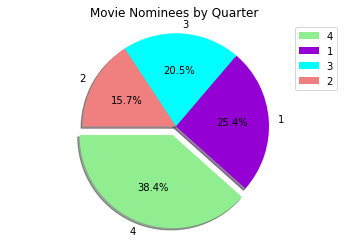

In [17]:
#create pie  for Nominees by Quarter

df1 = Oscar_Nominees_Release_Date_df["Quarter_Released"].value_counts().reset_index()
colors = ['lightgreen', 'darkviolet', 'cyan', 'lightcoral']
index = ('Q1', 'Q2', 'Q3', 'Q4')
plt.pie(data=df1,x='Quarter_Released',labels='index', autopct='%.1f%%', explode=(0.1,0,0,0), shadow=True, startangle=180, colors = colors)
plt.axis('equal')
plt.title('Movie Nominees by Quarter')
plt.legend()
plt.savefig("NomineesByQuarters.png")
plt.show()

#create donut plot for Nominees by quarter

# df1 = Oscar_Nominees_Release_Date_df["Quarter_Released"].value_counts().reset_index()
# colors = ['lightgreen', 'darkviolet', 'cyan', 'lightcoral']
# index = ('Q1', 'Q2', 'Q3', 'Q4')
# plt.pie(data=df1,x='Quarter_Released',labels='index', autopct='%.1f%%', explode=(0.1,0,0,0), shadow=True, startangle=180, colors = colors)
# plt.axis('equal')
# my_circle=plt.Circle( (0,0), 0.7, color='lightpink')
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.title('Movie Nominees by Quarter')
# plt.legend()
# plt.show()

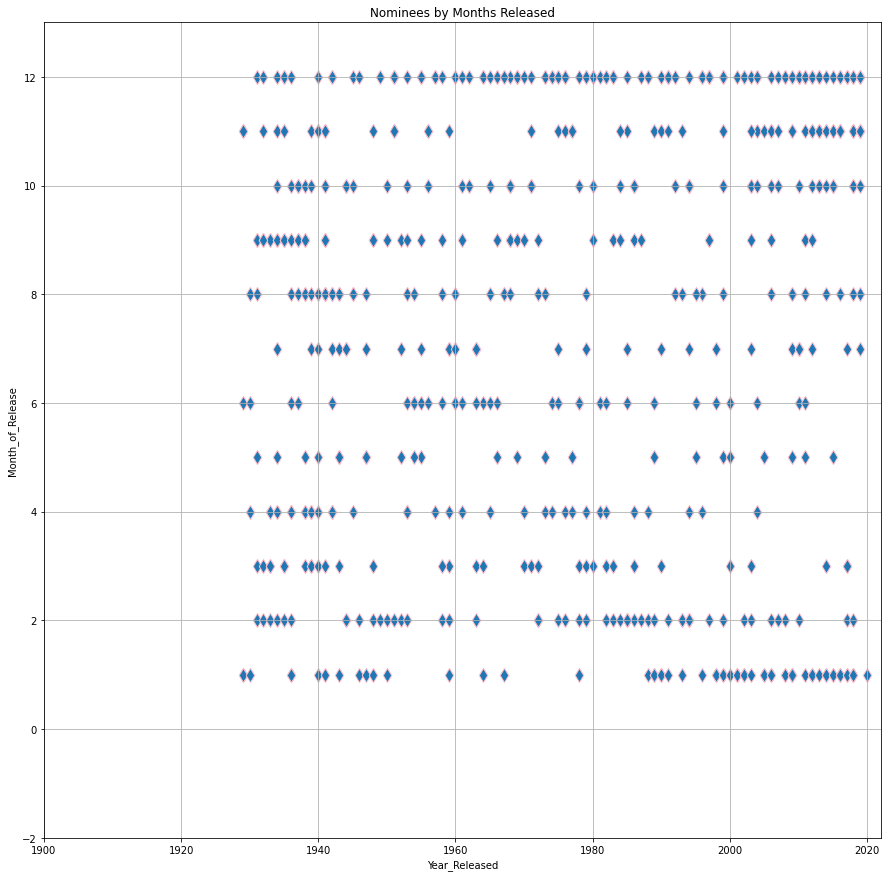

In [18]:
#create a pandas plot for winners by month
Oscar_Nominees_Release_Date_df.plot.scatter(x="Year_Released", y="Month_of_Release", xlim = (1900, 2022), ylim= (-2, 13), marker = 'd', edgecolor = "pink", grid = True, s = 100, figsize=(15,15))

plt.title('Nominees by Months Released')
#plt.savefig("WinnersByMonths.png")
plt.show()

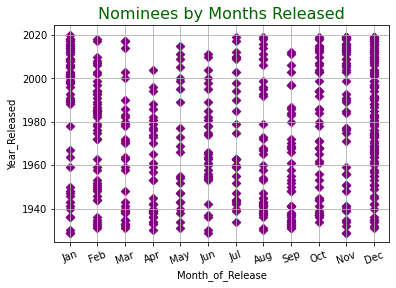

In [19]:
#using matplotlib create a scatter plot by month, changing tick names to months
plt.scatter(Oscar_Nominees_Release_Date_df["Month_of_Release"],Oscar_Nominees_Release_Date_df["Year_Released"], c = "purple", marker = "D")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], rotation=20)
plt.title("Nominees by Months Released",size=16, color="darkgreen")

plt.xlabel("Month_of_Release")

plt.ylabel("Year_Released")
plt.size = 150
plt.grid(True)
plt.savefig("NomineesByMonth.png")
plt.show()


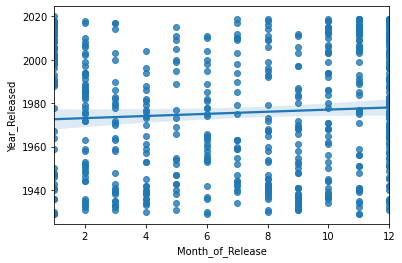

In [22]:
#create a linear regression plot using seaborn
sns.regplot(x=Oscar_Nominees_Release_Date_df["Month_of_Release"], y=Oscar_Nominees_Release_Date_df["Year_Released"], data=year)
plt.savefig("NomineesByMonthRegression.png")